In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('Phase2-Project-13_loan_prediction.csv')

In [2]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [4]:
df.shape

(614, 13)

# EDA
1. Null/NaN

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
categorical_col =[]
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")
num_col =[]
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        num_col.append(i)
print("Numerical Columns: ", num_col)
print("\n")

Categorical Columns:  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numerical Columns:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']




In [7]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [8]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [9]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [10]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
df["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [12]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [13]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [14]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0]) # Fill the nan values with mode as it is an object

In [15]:
df["Married"]=df["Married"].fillna(df["Married"].mode()[0]) # Fill the nan values with mode as it is an object

In [16]:
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0]) # Fill the nan values with mode as it is an object

In [17]:
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0]) # Fill the nan values with mode as it is an object

In [18]:
df["LoanAmount"]=df["LoanAmount"].fillna((df["LoanAmount"].median())) # Fill the nan values with median

In [19]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna((df["Loan_Amount_Term"].median())) # Fill the nan values with median

In [20]:
df["Credit_History"]=df["Credit_History"].fillna((df["Credit_History"].median())) # Fill the nan values with median

In [21]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [23]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Note2: 
- it has 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area', 'Loan_Status'  as object

In [57]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      502
Female    112
Name: Gender, dtype: int64


Yes    401
No     213
Name: Married, dtype: int64


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     532
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253

In [24]:
df.nunique().to_frame("No of unique values")

,No of unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


# Note3:
Loan_ID can be dropped as it has unique values.

In [25]:
columns_to_drop=["Loan_ID"]
df = df.drop(columns_to_drop, axis=1)

In [26]:
df.shape

(614, 12)

# 2. Label Encoder

In [27]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
        
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 57.7 KB


# 3. Skewness, Outliars (We donot remove Skewness and Outliars from categorial columns)

In [29]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


## Note 2: Observations:
- Column count is same: No missing data
- There is no negative/valid _ Dataset is OK
- Median (50%) > Mean - "ApplicantIncome","Loan_Amount_Term" --> Left Skewed
- Median (50%) < Mean - "CoapplicantIncome","LoanAmount"-> Right Skewed
- Standard Dev for "ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term" is high -> Outliars are present
- Percentile 75% and max : It is there in "Dependents","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term" -> outliars are present

In [30]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

ApplicantIncome and CoapplicantIncome is skewed

In [31]:
x = ['ApplicantIncome', 'CoapplicantIncome']

for i in x:
    df[i] = np.cbrt(df[i])   # Remove Skewness

In [32]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

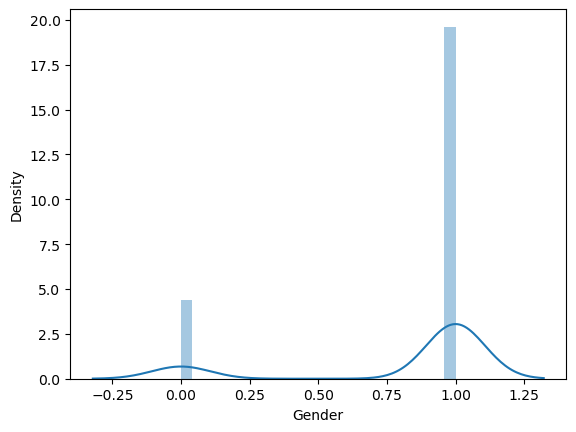

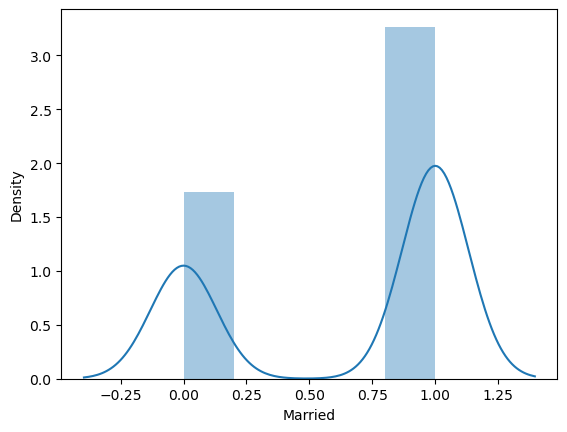

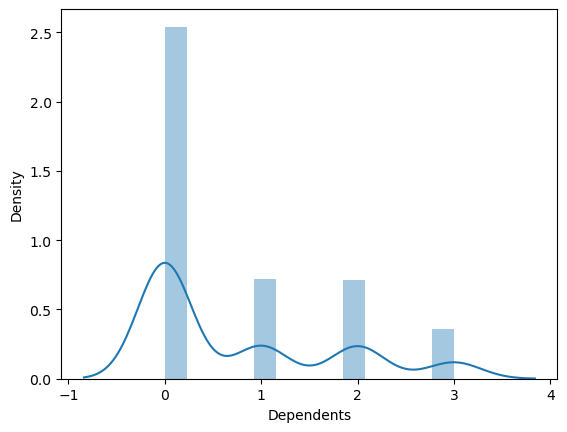

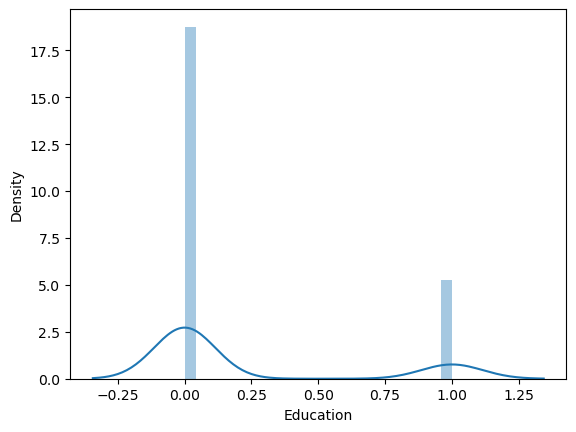

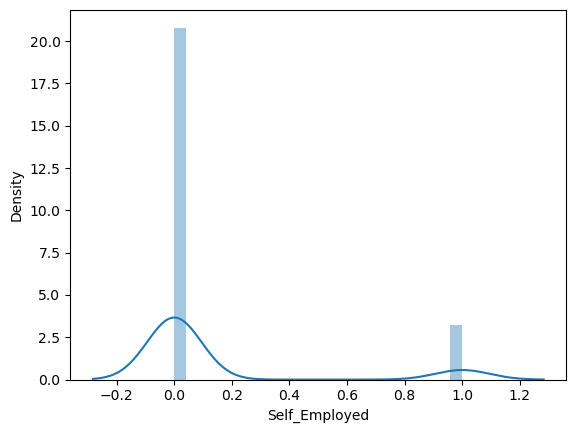

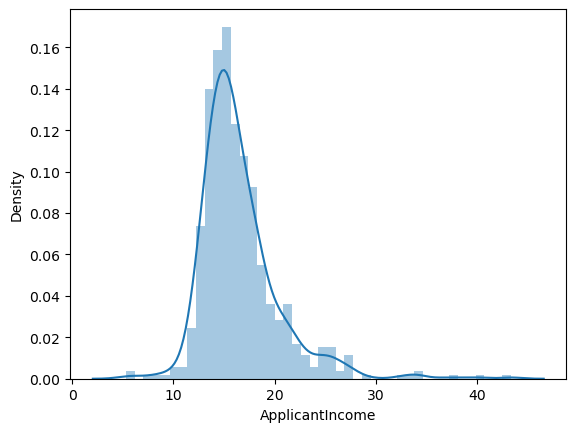

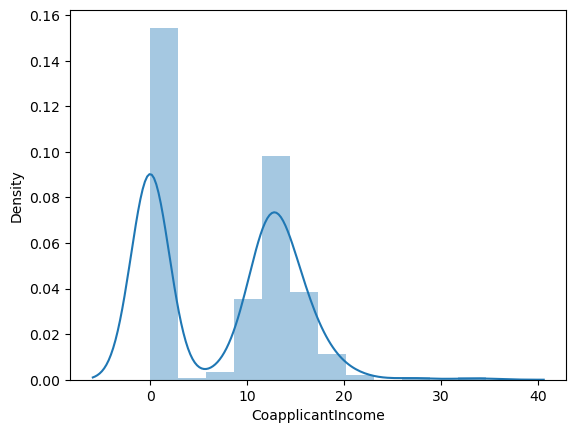

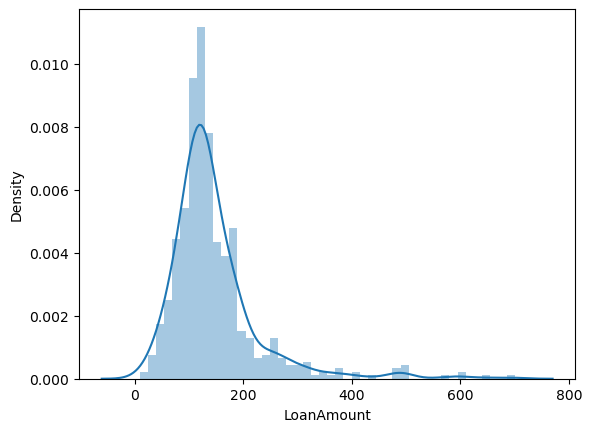

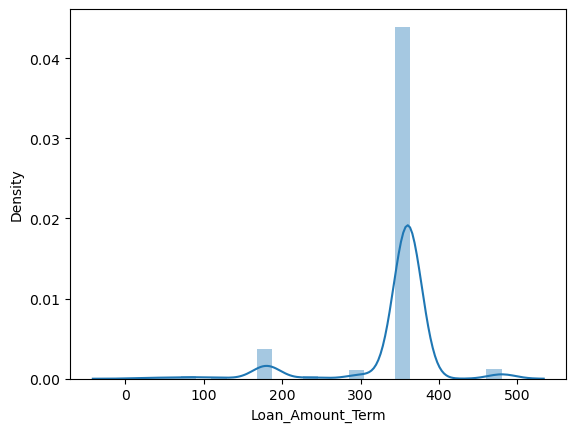

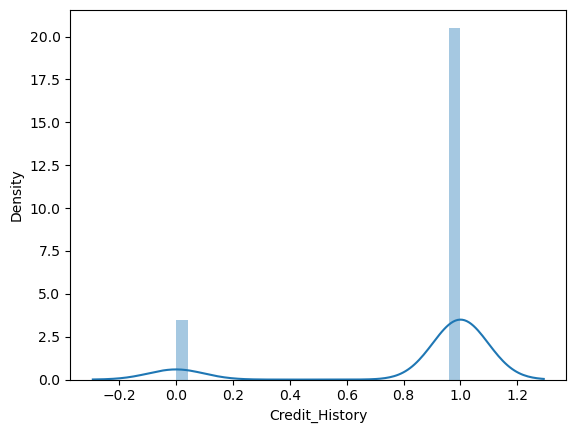

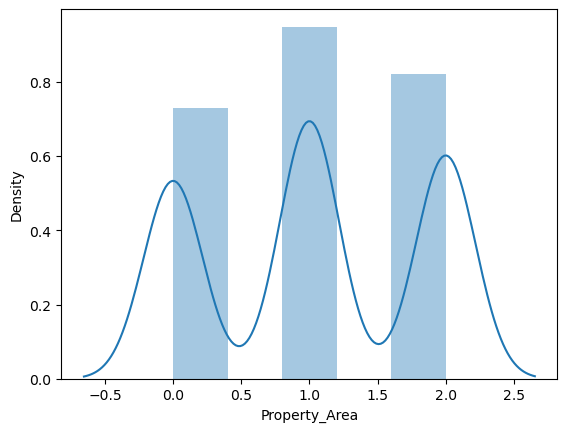

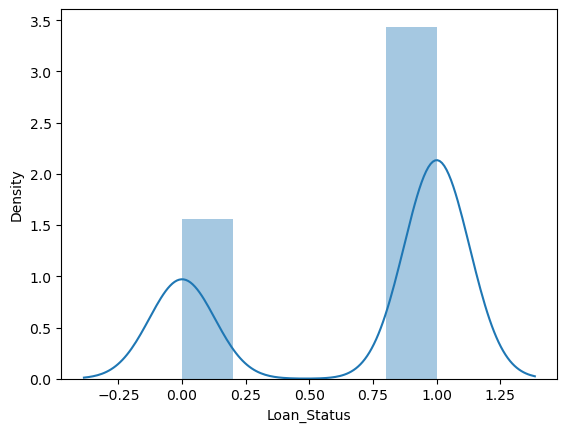

In [67]:
for i in df.columns: # Skewness
    plt.figure()
    sns.distplot(df[i])

Gender                  Axes(0.125,0.653529;0.168478x0.226471)
Married              Axes(0.327174,0.653529;0.168478x0.226471)
Dependents           Axes(0.529348,0.653529;0.168478x0.226471)
Education            Axes(0.731522,0.653529;0.168478x0.226471)
Self_Employed           Axes(0.125,0.381765;0.168478x0.226471)
ApplicantIncome      Axes(0.327174,0.381765;0.168478x0.226471)
CoapplicantIncome    Axes(0.529348,0.381765;0.168478x0.226471)
LoanAmount           Axes(0.731522,0.381765;0.168478x0.226471)
Loan_Amount_Term            Axes(0.125,0.11;0.168478x0.226471)
Credit_History           Axes(0.327174,0.11;0.168478x0.226471)
Property_Area            Axes(0.529348,0.11;0.168478x0.226471)
Loan_Status              Axes(0.731522,0.11;0.168478x0.226471)
dtype: object

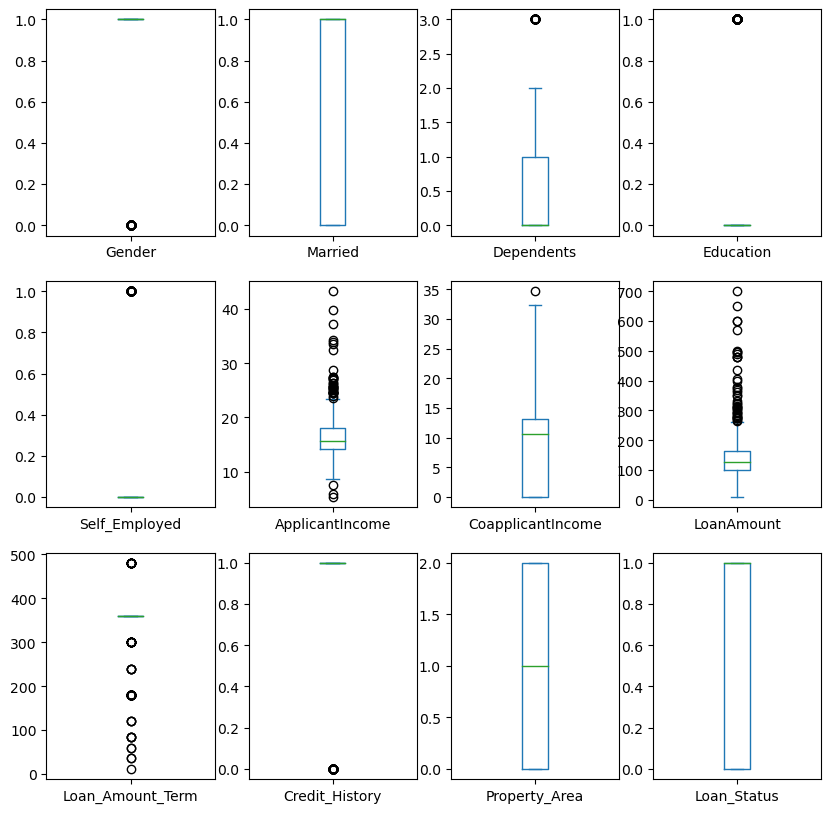

In [68]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,10))

Note 3: Observations:
.
ApplicantIncome,LoanAmount and Loan_Amount_Term has major outliares. 

Others having outliars are Gender, Dependents,
Education,Self_Employed,CoapplicantIncome,Credit_History

# Remove Outliers

In [33]:
from scipy.stats import zscore
ol = ['ApplicantIncome','LoanAmount','Loan_Amount_Term']
x_x=0
for i in ol:
    y_y=0
    col = df[i]
    z=zscore(col)
    thresh =3
    df1 = df[(z < thresh) & (z > -thresh)]
    y_y = df.shape[0]-df1.shape[0]
    x_x= x_x + y_y

print("Data loss rate",(x_x/df.shape[0])*100)

Data loss rate 5.700325732899023


# 4. Co- Relation and Multicolinearity

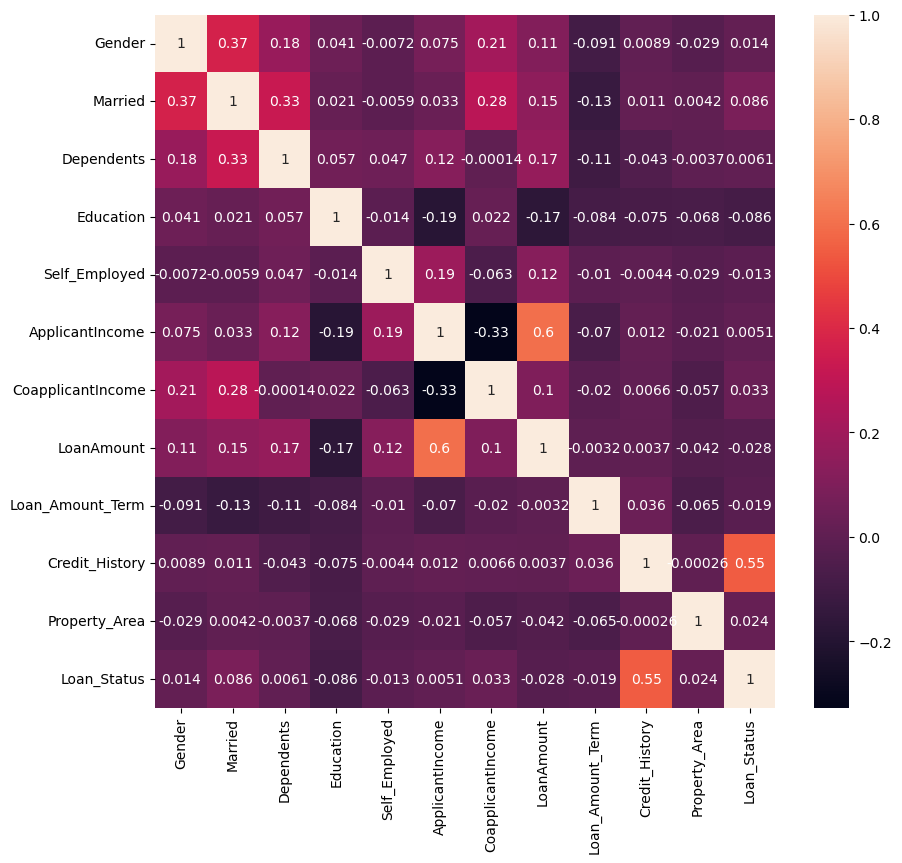

In [34]:
corr_hmap=df1.corr()
plt.figure(figsize=(10,9))
sns.heatmap(corr_hmap,annot=True)
plt.show()

- Near to Zero : No Corelation- Low Corelation Worst - "Gender", "Married","CoApplicant Income", "Property Area"
- 0.3 or >-0.3 --> 
- 0.5 or >-0.5 --> Mod Corelation - "Credit_History"
- 0.7 or >-0.7 --> High Corelation 

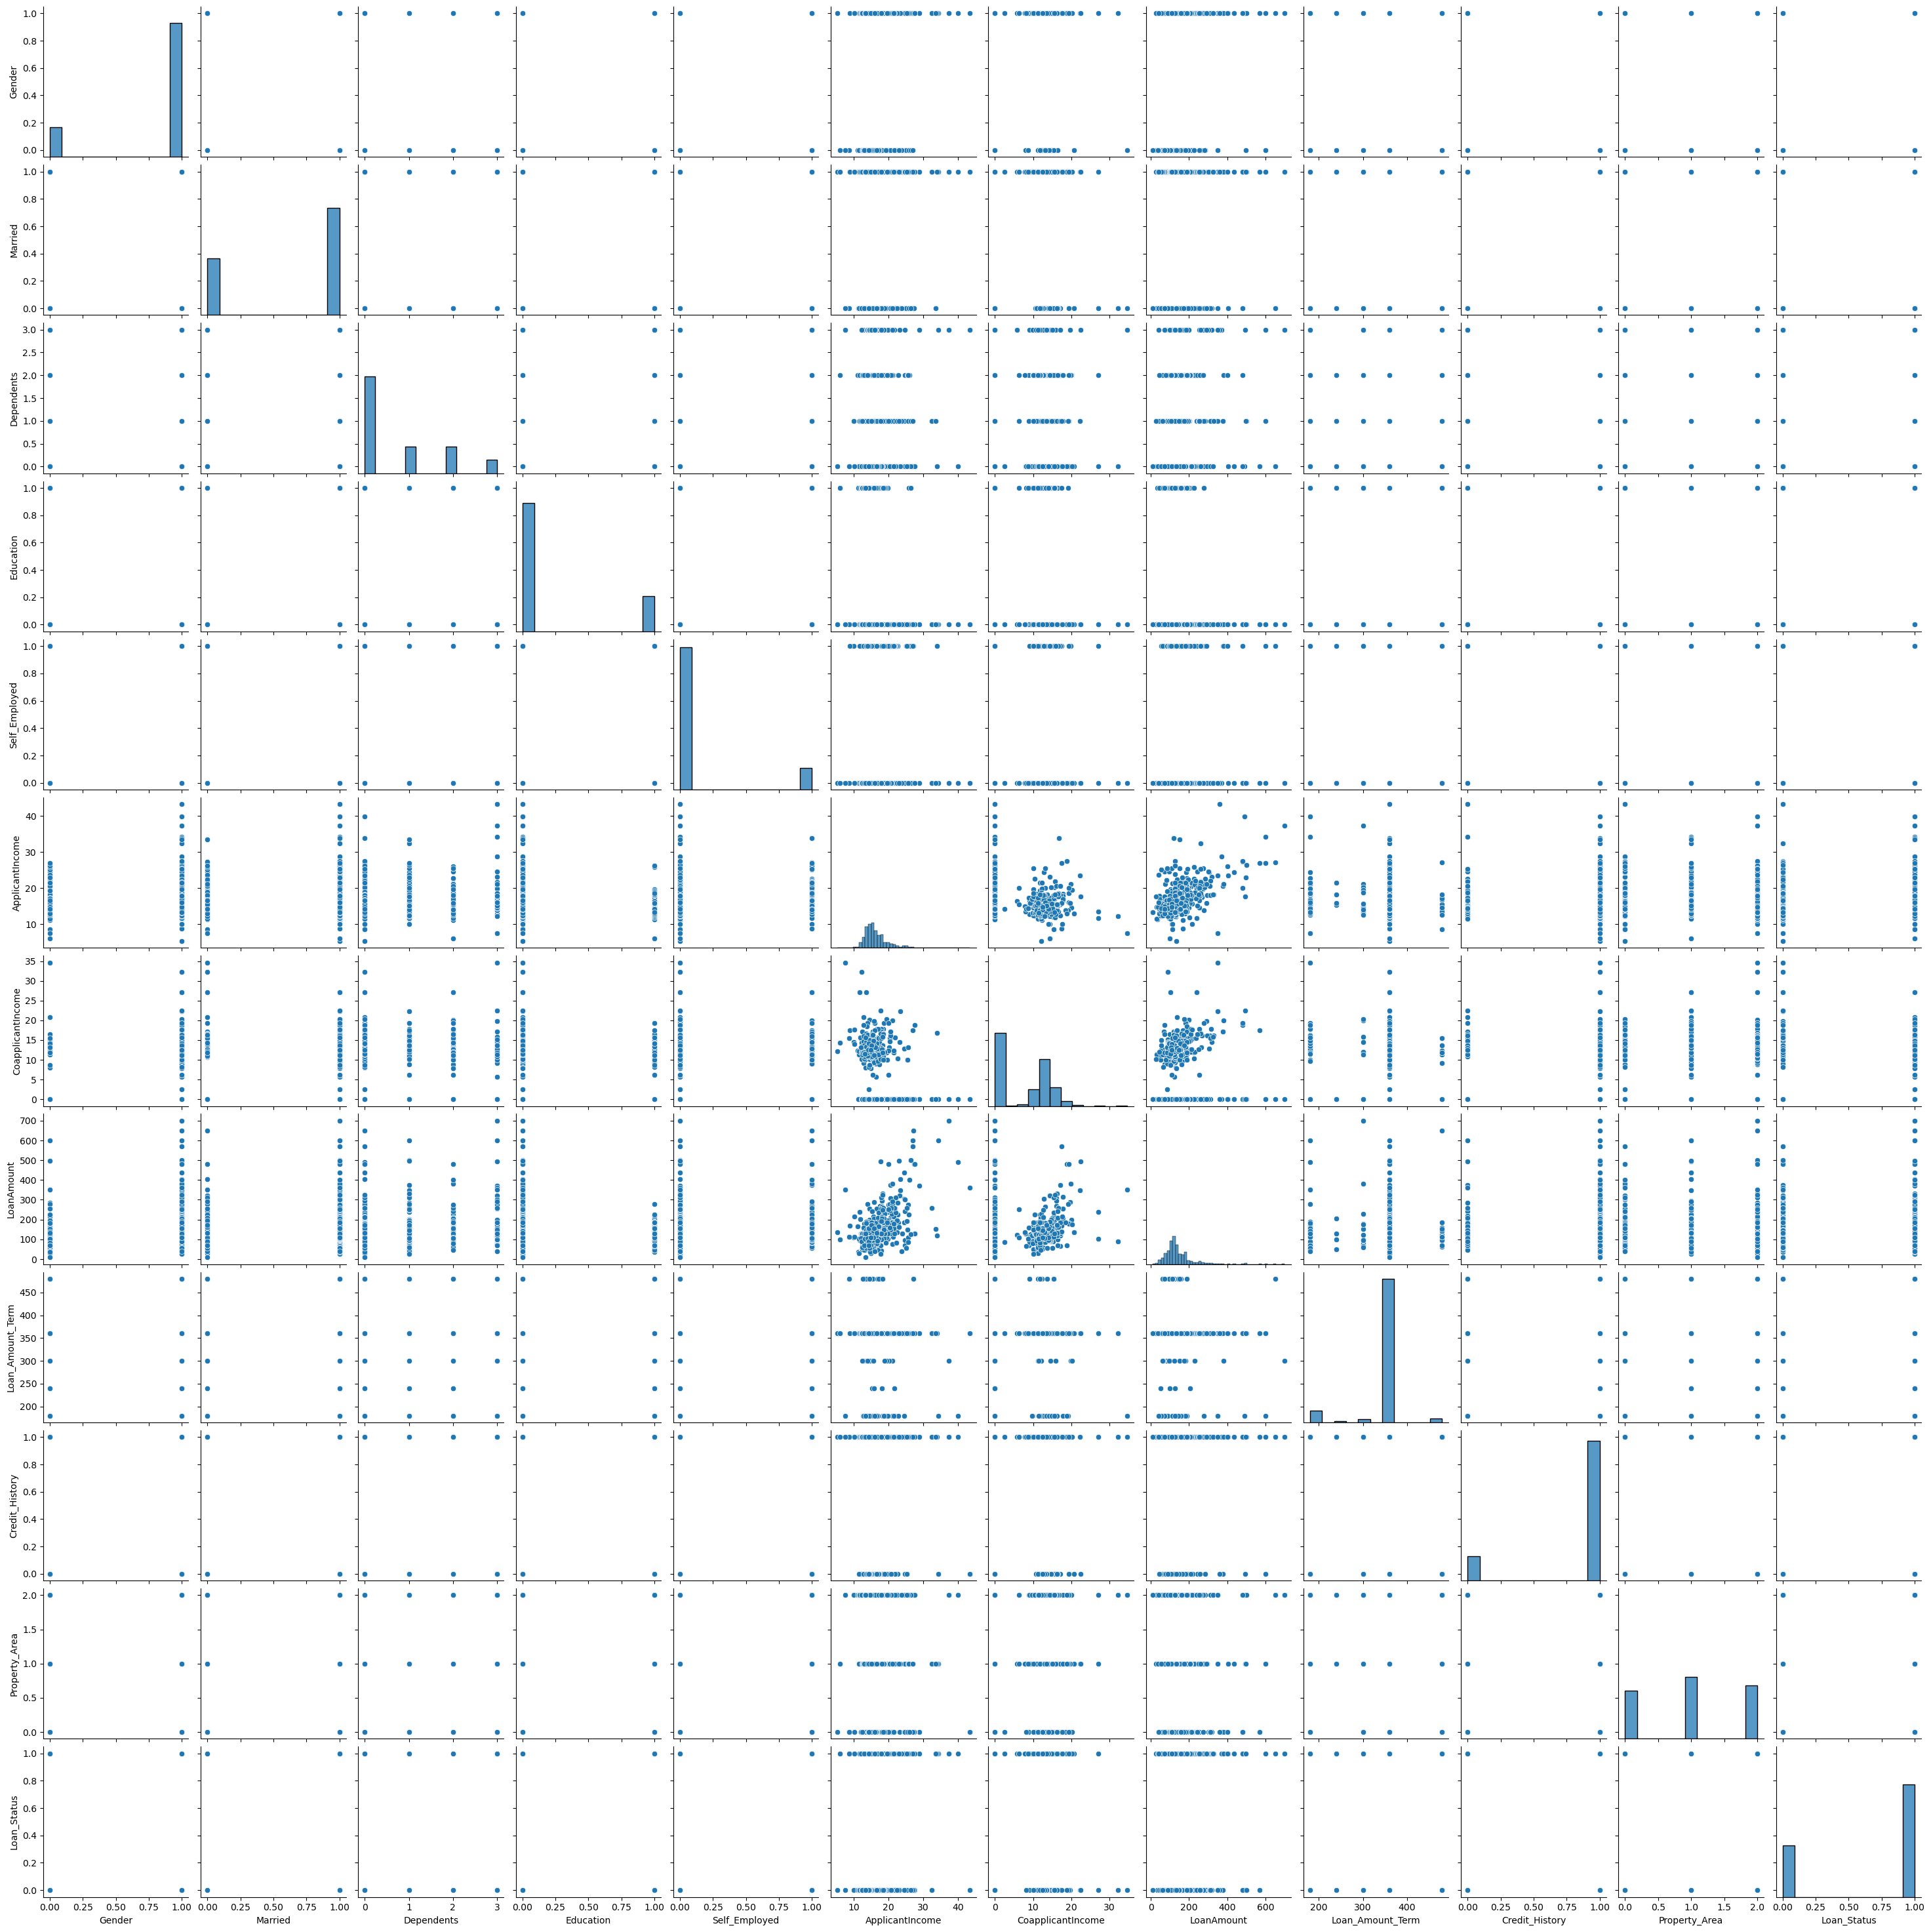

In [72]:
sns.pairplot(df1)

In [75]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.iloc[:,0:-1]
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

    VIF Factor           features
0     6.466538             Gender
1     3.909203            Married
2     1.815741         Dependents
3     1.302604          Education
4     1.200756      Self_Employed
5    25.338846    ApplicantIncome
6     2.787675  CoapplicantIncome
7     7.008083         LoanAmount
8    15.949079   Loan_Amount_Term
9     6.404794     Credit_History
10    2.628114      Property_Area


In [36]:
columns_to_drop=['ApplicantIncome','Loan_Amount_Term'] # Least co-relation with output and high multicollinearity
df = df.drop(columns_to_drop, axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,0.000000,128.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,11.467457,128.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.000000,66.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,13.310098,120.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.000000,141.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,0.000000,71.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,0.000000,40.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,6.214465,253.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,0.000000,187.0,1.0,2.0,1.0


# MODEL
1. Feature Scaling using Standard Scalarization

In [37]:
y=df["Loan_Status"]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.380325,-1.053225,-0.211241,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.022870,0.561256,-0.211241,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.533028,-1.053225,-0.948996,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.711341,0.820678,-0.306435,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.419383,-1.053225,-0.056551,0.273231,0.411733,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.574203,-1.053225,-0.889500,0.273231,0.411733,-1.318513
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.128936,-1.053225,-1.258378,-2.522836,0.411733,-1.318513
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.899211,-0.178302,1.276168,0.273231,0.411733,1.223298
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.794146,-1.053225,0.490816,0.273231,0.411733,1.223298


# 2. OverSampling

In [38]:
y.value_counts()

Loan_Status
1.0    422
0.0    192
Name: count, dtype: int64

In [39]:
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1=SM.fit_resample(x,y)

In [40]:
y1.value_counts()

Loan_Status
1.0    422
0.0    422
Name: count, dtype: int64

# 3. Best random state value:

In [41]:
y1.unique() # Will apply classification model

array([1., 0.])

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," at random state ", maxRS)

Best accuracy is 0.8779527559055118  at random state  155


# 4. Creating train test split

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

# 5. Classification Algorithms and Cross Validation Score¶

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
rfc=RandomForestClassifier()
etc=ExtraTreesClassifier()
lg=LogisticRegression()
svc=SVC(kernel = "linear")
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
dtc = DecisionTreeClassifier(criterion = "gini")



model=[rfc,etc,lg,svc,gbc,abc,bc,gnb,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of:  ",m," is " )
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")
    score = cross_val_score(m,x1,y1)
    print("Cross Validation of:  ",m," is " )
    print(score)
    print(score.mean())
    print("Diff in Acc Score and Cross Val Score is - ",accuracy_score(y_test,predm)-score.mean())
    print("\n")

Accuracy Score of:   RandomForestClassifier()  is 
0.8700787401574803
[[108  21]
 [ 12 113]]
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87       129
         1.0       0.84      0.90      0.87       125

    accuracy                           0.87       254
   macro avg       0.87      0.87      0.87       254
weighted avg       0.87      0.87      0.87       254



Cross Validation of:   RandomForestClassifier()  is 
[0.75147929 0.75739645 0.85207101 0.84615385 0.86309524]
0.8140391659622429
Diff in Acc Score and Cross Val Score is -  0.05603957419523742


Accuracy Score of:   ExtraTreesClassifier()  is 
0.8543307086614174
[[111  18]
 [ 19 106]]
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86       129
         1.0       0.85      0.85      0.85       125

    accuracy                           0.85       254
   macro avg       0.85      0.85      0.85       254
weighted avg       0

# Best Model is : RandomForestClassifier

# 6. Hyper Parameter Tuning

In [91]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [92]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [93]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [94]:
GCV.best_params_

{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [95]:
RFC_final = RandomForestClassifier(
  bootstrap =  False,
  max_depth = None,
  min_samples_leaf = 1,
  min_samples_split = 5,
  n_estimators =  100,
  random_state=maxRS )
RFC_final.fit(x_train,y_train)
pred=RFC_final.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

88.18897637795276


# 7. Saving the Model

In [96]:
import joblib # save as *.pkl
joblib.dump(RFC_final,"Phase2-Project-13_loan_prediction_project.pkl")

['Phase2-Project-13_loan_prediction_project.pkl']